# Atividade 4

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

from scipy.stats import kruskal

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

In [5]:
seed = 10

## Leitura dos dados

In [3]:
dataset = pd.read_csv('../Dataset/dataset_pca.csv')

## Separação dos Dados

In [4]:
X = dataset.drop('target', axis=1)
y = dataset.loc[:,'target']

### Separação dos dados para Treino e Teste

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=seed)

## Experimentos

In [9]:
scoring = 'accuracy'
cv = 10
folds = StratifiedKFold(n_splits=cv, random_state=seed)

In [27]:
knn = KNeighborsClassifier(n_neighbors=1, metric='manhattan')
knn_scores = cross_val_score(estimator=knn, X=X_train, y=y_train, cv=folds, scoring=scoring)
print(knn_scores)
print('Mean: %.5f, std: %.5f' % (np.mean(knn_scores), np.std(knn_scores)))

[0.99330784 0.99713193 0.99808429 0.99712368 0.99616491 0.99808245
 0.99712368 0.99232246 0.99711816 0.99231508]
Mean: 0.99588, std: 0.00219


In [26]:
# tree = DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_split=2, random_state=seed)
# tree_scores = cross_val_score(estimator=tree, X=X_train, y=y_train, cv=folds, scoring=scoring)
print(tree_scores)
print('Mean: %.5f, std: %.5f' % (np.mean(tree_scores), np.std(tree_scores)))

[0.97801147 0.9789675  0.98084291 0.98082454 0.97986577 0.97986577
 0.98274209 0.96737044 0.97790586 0.9673391 ]
Mean: 0.97737, std: 0.00519


In [25]:
forest = RandomForestClassifier(n_estimators=110, random_state=seed)
forest_scores = cross_val_score(estimator=forest, X=X_train, y=y_train, cv=folds, scoring=scoring)
print(forest_scores)
print('Mean: %.5f, std: %.5f' % (np.mean(forest_scores), np.std(forest_scores)))

[0.99043977 0.99713193 0.99616858 0.99424736 0.99424736 0.99712368
 0.99520614 0.98944338 0.99711816 0.9932757 ]
Mean: 0.99444, std: 0.00260


In [24]:
mlp = MLPClassifier(hidden_layer_sizes=(55, 55, 50), activation='tanh', solver='lbfgs', max_iter=2000, random_state=seed)
mlp_scores = cross_val_score(estimator=mlp, X=X_train, y=y_train, cv=folds, scoring=scoring)
print(mlp_scores)
print('Mean: %.5f, std: %.5f' % (np.mean(mlp_scores), np.std(mlp_scores)))

[0.99426386 0.99713193 0.99616858 0.99616491 0.99616491 0.99808245
 0.99424736 0.99328215 0.99615754 0.99519693]
Mean: 0.99569, std: 0.00137


In [23]:
bagging = BaggingClassifier(mlp, n_estimators=10)
bagging_scores = cross_val_score(estimator=bagging, X=X_train, y=y_train, cv=folds, scoring=scoring)
print(bagging_scores)
print('Mean: %.5f, std: %.5f' % (np.mean(bagging_scores), np.std(bagging_scores)))

[0.99330784 0.99617591 0.99616858 0.99520614 0.99712368 0.99808245
 0.99520614 0.99328215 0.9932757  0.99519693]
Mean: 0.99530, std: 0.00157


In [22]:
voting = VotingClassifier(estimators=[('knn', knn), ('tree', tree), ('forest', forest), ('mlp', mlp)])
voting_scores = cross_val_score(estimator=voting, X=X_train, y=y_train, cv=folds, scoring=scoring)
print(voting_scores)
print('Mean: %.5f, std: %.5f' % (np.mean(voting_scores), np.std(voting_scores)))

[0.99330784 0.99713193 0.99712644 0.99616491 0.99616491 0.99712368
 0.99712368 0.99232246 0.99903939 0.99615754]
Mean: 0.99617, std: 0.00187


## Teste estatístico

In [28]:
stat, p = kruskal(knn_scores, tree_scores, forest_scores, mlp_scores, bagging_scores, voting_scores)
print(stat, p)

26.900403922224086 5.9647093364096856e-05


In [29]:
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

Different distributions (reject H0)


In [30]:
results = pd.DataFrame([knn_scores, tree_scores, forest_scores, mlp_scores, bagging_scores, voting_scores])
results.index = ['KNN', 'DT', 'RF', 'MLP', 'BG', 'VT']
results

,0,1,2,3,4,5,6,7,8,9
KNN,0.993308,0.997132,0.998084,0.997124,0.996165,0.998082,0.997124,0.992322,0.997118,0.992315
DT,0.978011,0.978967,0.980843,0.980825,0.979866,0.979866,0.982742,0.967370,0.977906,0.967339
RF,0.990440,0.997132,0.996169,0.994247,0.994247,0.997124,0.995206,0.989443,0.997118,0.993276
MLP,0.994264,0.997132,0.996169,0.996165,0.996165,0.998082,0.994247,0.993282,0.996158,0.995197
BG,0.993308,0.996176,0.996169,0.995206,0.997124,0.998082,0.995206,0.993282,0.993276,0.995197
VT,0.993308,0.997132,0.997126,0.996165,0.996165,0.997124,0.997124,0.992322,0.999039,0.996158


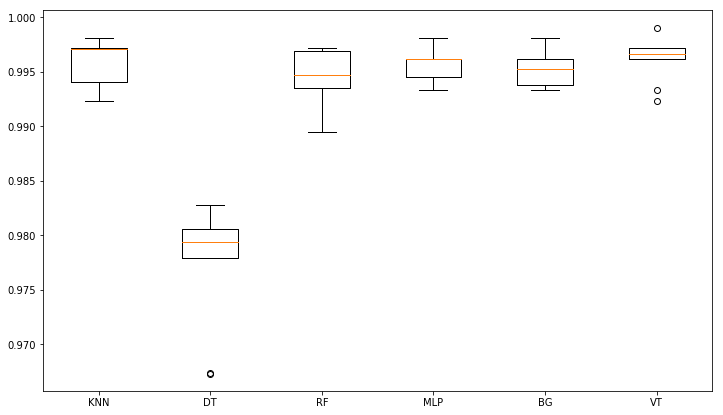

In [31]:
fig, ax = plt.subplots(figsize=(12,7))

ax.boxplot(results)
plt.xticks([1, 2, 3, 4, 5, 6], ['KNN', 'DT', 'RF', 'MLP', 'BG', 'VT'])
# plt.savefig('boxplot_results.png')
plt.show()

### Avaliação no conjunto de treino

Accuracy: 0.778
              precision    recall  f1-score   support

           1       0.69      1.00      0.82        18
           2       0.80      0.63      0.71        19
           3       1.00      0.50      0.67         4
           5       0.50      0.33      0.40         3
           6       1.00      0.50      0.67         2
           7       1.00      1.00      1.00         8

   micro avg       0.78      0.78      0.78        54
   macro avg       0.83      0.66      0.71        54
weighted avg       0.80      0.78      0.77        54



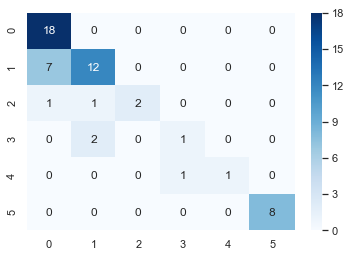

In [25]:
voting = VotingClassifier(estimators=[('knn', knn), ('tree', tree), ('forest', forest), ('mlp', mlp)])
voting.fit(X_train, y_train)

pred = voting.predict(X_test)

print('Accuracy: %.5f' % accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

sns.set(font_scale=1)
sns.heatmap(confusion_matrix(y_test, pred), annot=True, cmap='Blues')
# plt.savefig('confusion_matrix_voting.png')